In [134]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
# churn_data['CustomerId'].nunique() == churn_data[
#     'CustomerId'].value_counts().sum()
# # churn_data['CustomerId'].value_counts().sum()

# churn_data[churn_data['Exited']==1].groupby('NumOfProducts')['Exited'].value_counts()
# choropleth_data = churn_data[churn_data['Exited'] == 1]
# churn_data.groupby('Geography').count()
churn_data.sort_values(by='Balance', ascending=False).head(50)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,2093,15757408,Lo,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,3281,15715622,To Rot,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,8734,15714241,Haddon,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3588,3589,15571958,McIntosh,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
6717,6718,15586674,Shaw,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
1067,1068,15599131,Dilke,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
138,139,15594408,Chia,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
1533,1534,15769818,Moore,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
3920,3921,15620268,Thomson,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
2709,2710,15780212,Mao,592,France,Male,37,4,212692.97,1,0,0,176395.02,0


In [29]:
name = input('Name?')

print(f'''Hello, {name}''')

Hello, bob


([<matplotlib.patches.Wedge at 0x1db68b18a70>,
 [Text(-0.35216690991224814, 1.042102906417048, 'Female'),
  Text(0.352167007480962, -1.0421028734447977, 'Male')],
 [Text(-0.19209104177031713, 0.5684197671365716, '60.4%'),
  Text(0.19209109498961563, -0.5684197491517078, '39.6%')])

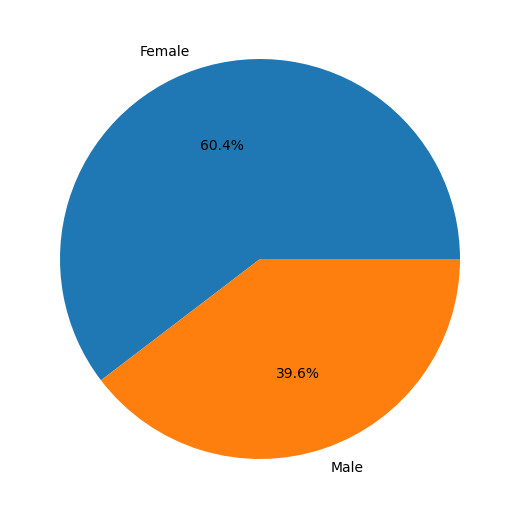

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')

female_ex = churn_data[ churn_data['Gender'] == 'Female' ]['Exited'].mean()
male_ex = churn_data[ churn_data['Gender'] == 'Male' ]['Exited'].mean()

# female_ex_count = churn_data[ (churn_data['Gender'] == 'Female') & (churn_data['Exited'] == 1) ].value_counts()
# male_ex_count = churn_data[ (churn_data['Gender'] == 'Male') & (churn_data['Exited'] == 1)].value_counts()

# print(female_ex_count)
# print(male_ex_count)

# data_ex = churn_data[churn_data['Exited']==1].groupby('Gender')['Exited'].mean()
data_ex = churn_data.groupby('Gender')['Exited'].mean()


data_ex

fig = plt.figure(figsize=(5,5))

gender_ratio_ex = fig.add_axes( [0, 0, 1, 1] )
gender_ratio_ex.pie(
    data_ex,
    labels = data_ex.index,
    autopct='%.1f%%',
    # explode = [0.02, 0]
)


C:\Users\nitys\AppData\Local\Temp\ipykernel_20628\1566100385.py:36: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ratio_credit_tenure_df = churn_data.pivot_table(


pandas.core.frame.DataFrame

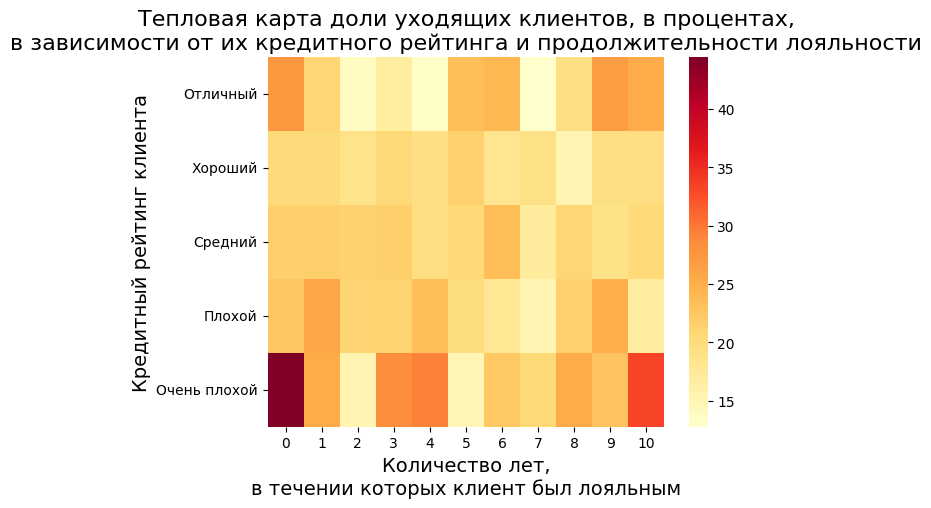

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')

# Функция преобразования количественного показателя кредитного рейтинга в категориальный

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

# Добавление нового категориального признака кредитоного рейтинга, изменение значений
# столбца лояльности умножением на 100 (для дальнейшего представления в виде процентов)
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')
churn_data['Exited'] = churn_data['Exited'].apply(lambda x: x*100)

# ratio_credit_tenure_df
ratio_credit_tenure_df = churn_data.pivot_table(
    index='CreditScoreCat',
    columns='Tenure',
    values='Exited',
    )

# " Костыль "
# При формировании pivottable произошла сортировка категории кредитного рейтинга по алфавиту
# Сделаем коррективку для отражения верной сортировки
ratio_credit_tenure_df['to_del'] = [1, 3, 2, 4, 5]
ratio_credit_tenure_df = ratio_credit_tenure_df.sort_values(by='to_del')
del ratio_credit_tenure_df['to_del']


# Построим тепловую карту.
# МЕНТОРУ: в задании сказано карту с аннотациями, если подразумевались аннотации как параметр, 
    #  а не как пояснения, то он закомменчен в коде - annot
    
heatmap = sns.heatmap(
    data=ratio_credit_tenure_df, 
    cmap='YlOrRd',
    # annot = True, 
    yticklabels=['Отличный', 'Хороший', 'Средний', 'Плохой', 'Очень плохой']
    )

heatmap.set_title(('Тепловая карта доли уходящих клиентов, в процентах,' + '\n' 
                   + 'в зависимости от их кредитного рейтинга и продолжительности лояльности'),
                  fontsize=16)

heatmap.set_ylabel('Кредитный рейтинг клиента', 
                   fontsize = 14)
heatmap.set_xlabel(('Количество лет,' + '\n' 'в течении которых клиент был лояльным'), 
                   fontsize = 14)

